# ML Exercise 19 

# Multi-armed bandit

Objective: understanding the integration of exploration and exploitation.

In [ ]:
import random
import itertools
import matplotlib.pyplot as plt
import numpy as np

# random seed
random.seed(20191203)

def plotdata(R, d=1):
    n = len(R)
    t = []
    y = []
    for i in range(0,int(n/d)):
        t.append(np.mean(range(i*d,(i+1)*d)));
        y.append(np.mean(R[i*d:min(n,(i+1)*d)]))
    return t,y


## Environment

Bandit model

Two different setups of the rewards (setup=0/1),
same standard deviation `sigma`.

In [ ]:
class Bandit:
  def __init__(self,setup,sigma=1):
    if setup==0:
      self.R = [ 1, 2, 3, 4, 5, 10, 15, 20, 25, 50, 75, 100 ]
    else:  
      self.R = [ 100, 75, 50, 25, 20, 15, 10, 5, 4, 3, 2, 1 ]
    self.S = sigma
    self.n = len(self.R)
    self.state = 'x0'

  def action_space(self):
    return range(0,self.n)

  def step(self, a):
    s = self.state
    r = random.gauss(self.R[a],self.S)
    return s,r

# create environment
setup = 1
s = 10
env = Bandit(setup,s)

aspace = env.action_space()
n = len(aspace)

print('Bandit: setup:%d stddev:%.1f' %(setup,s))


Bandit: setup:1 stddev:10.0


## Agent

In [ ]:
class Agent:
  def __init__(self, nactions, epsilon, rmax=0):
    self.epsilon = epsilon
    self.rmax = rmax
    self.nactions = nactions
    self.C = np.zeros(self.nactions)
    self.Q = np.zeros(self.nactions) + rmax

  def choose(self):
    r = random.random()
    if r < self.epsilon:
      # choose a random action
      a = random.randrange(0,self.nactions)
    else:
      # choose a best action (random if multiple ones)
      m = np.max(self.Q)
      maxs = [i for i,v in enumerate(self.Q) if v == m]
      a = random.choice(maxs)
    return a

  def update(self,a,r):
      self.C[a] += 1
      self.Q[a] = self.Q[a] + 1.0/self.C[a] * (r - self.Q[a])


# Training set-up

In [ ]:
epsilon = [0.0,   # only exploitation (greedy)
           0.1,   # combine exploration and exploitation
           1.0]   # only exploration (random)

# set of experiments to run
# each experiment: [agent, label, reward history]
experiments = []
for e in epsilon:
  agent = Agent(n,e)
  label = 'e %.2f' %e
  rh = []
  experiments.append([agent, label, rh])
agent = Agent(n,epsilon=0.0,rmax=500)
label = 'e=0.0 rmax'
rh = []
experiments.append([agent, label, rh])


## Training

Train all the experiments for `T` episodes.

This block can be repeated multiple times to continue learning.
If you change the bandit behavior during learning, you can appreciate the ability of the model to adapt to the new behavior.


In [ ]:
T = 500

for exp in experiments:
  agent = exp[0]
  rh = exp[2]
  for t in range(T):
    a = agent.choose()
    s,r = env.step(a)
    agent.update(a,r)
    rh.append(r)


## Results

Plot the results obtained so far.


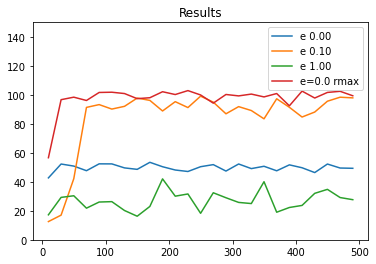

In [ ]:
plt.title('Results')
plt.ylim(bottom = 0, top = 150)

for exp in experiments:
  rh = exp[2]
  lab = exp[1]
  t,y = plotdata(rh, d=20)
  plt.plot(t, y, label=lab)

plt.legend()

plt.show()


## Home Exercises

**Question 1**  Small vs. large variance

Understand difference performance depending on the variance of the rewards

**Question 2**  Variable bandit

Understand performance when varying the environment. Train the agents with a bandit,
then change the bandit parameters and keep training without resetting the agents (i.e., skip the Training setup step).
